# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [4]:
#1
# print(app_train.groupby(['CNT_CHILDREN']).size())
cut_rule = pd.IntervalIndex.from_tuples([(-1, 0), (0, 2), (2, 5) , (5, app_train.groupby(['CNT_CHILDREN']).size().index.max())])
labels = ['0 個小孩', '有 1 - 2 個小孩', '有 3 - 5 個小孩', '有超過 5 個小孩']

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)

from collections import defaultdict
labels_dict = defaultdict(lambda:0)
for v in np.arange(len(labels)):
    labels_dict[cut_rule[v]] = labels[v]
# print(labels_dict)

#app_train['CNT_CHILDREN_GROUP'].value_counts()
print('Name: CNT_CHILDREN_GROUP, dtype: {0}'.format(app_train['CNT_CHILDREN'].dtypes))
app_train['CNT_CHILDREN_GROUP'].value_counts().rename(labels_dict).rename_axis('Labels').to_frame('Counts')

Name: CNT_CHILDREN_GROUP, dtype: int64


,Counts
Labels,
0 個小孩,215371
有 1 - 2 個小孩,87868
有 3 - 5 個小孩,4230
有超過 5 個小孩,42


In [5]:
#2-1
grp = ['CNT_CHILDREN_GROUP', 'TARGET']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
# grouped_df.mean()
print('Name: AMT_INCOME_TOTAL, dtype: {0}'.format(app_train['AMT_INCOME_TOTAL'].dtypes))
grouped_df.mean().rename(labels_dict).to_frame('Mean')

Name: AMT_INCOME_TOTAL, dtype: float64


Mean
CNT_CHILDREN_GROUP TARGET               
0 個小孩              0       166747.010980
                   1       160804.210548
有 1 - 2 個小孩        0       174590.584401
                   1       176115.362720
有 3 - 5 個小孩        0       175053.742913
                   1       160677.385714
有超過 5 個小孩          0       139159.090909
                   1       180000.000000

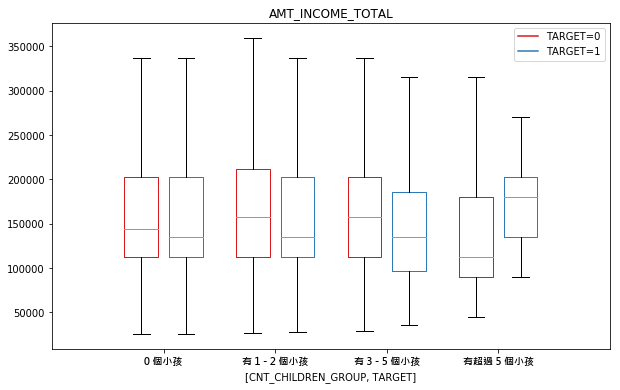

In [6]:
#2-2
plt_column = 'AMT_INCOME_TOTAL'
plt_by = ['CNT_CHILDREN_GROUP', 'TARGET']
# app_train.boxplot(column=plt_column, by=plt_by, showfliers=False, figsize=(12,12))
# plt.suptitle('')

gb = app_train.groupby(plt_by)[plt_column]
t = [[] for i in range(2)]
bp = [[] for i in range(2)]

plt.figure(figsize=(10, 6))

# 取出想分組畫圖的TARGET欄位
for k, g in app_train.groupby(plt_by)[plt_column]:
    if k[1] == 0:
        t[0].append(g)
    else:
        t[1].append(g)

bp[0] = plt.boxplot(t[0], positions=np.array(range(len(t[0]))) * 2.0 - 0.4, widths=0.6, showfliers=False)
bp[1] = plt.boxplot(t[1], positions=np.array(range(len(t[1]))) * 2.0 + 0.4, widths=0.6, showfliers=False)

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
#     plt.setp(bp['whiskers'], color=color)
#     plt.setp(bp['caps'], color=color)
#     plt.setp(bp['medians'], color=color)

set_box_color(bp[0], '#D7191C')
set_box_color(bp[1], '#2C7BB6')

plt.plot([], c='#D7191C', label='TARGET=0')
plt.plot([], c='#2C7BB6', label='TARGET=1')

# 解決繪圖無法正常顯示中文問題
from matplotlib.font_manager import FontProperties  
fontSet  = FontProperties(fname=r"c:\Windows\Fonts\msjhbd.ttc", size=10) 
fontSet2 = FontProperties(fname=r'C:\Windows\Fonts\mingliu.ttc', size=10)

plt.title(plt_column)
plt.xticks(ticks=range(0, len(labels) * 2, 2), labels=labels, fontproperties=fontSet)
plt.xlim(-2, len(labels) * 2)
plt.xlabel('[' + plt_by[0] + ', ' + plt_by[1] + ']')
plt.legend()
plt.show()

In [7]:
#3
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: ((x - x.mean()) / x.std()))

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.491521
1,270000.0,0.972434
2,67500.0,-0.934706
3,135000.0,-0.298993
4,121500.0,-0.426135
